In [3]:
import subprocess
import matplotlib.pyplot as plt

EXECUTABLE_PATH = "../../build/hold"

QUEUES = [
    "std_priority_queue", "binary_heap", "4ary_heap", "8ary_heap",
    "16ary_heap", "32ary_heap", "radix_heap_double"
]

def read_output(output):
    queue_sizes = []
    durations = []
    num_cmps = []
    for line in output.split("\n")[1:]:
        if "," not in line:
            continue
        queue_size, duration, num_cmp = line.split(",")
        queue_sizes.append(float(queue_size))
        durations.append(float(duration))
        num_cmps.append(int(num_cmp))
    return queue_sizes, durations, num_cmps

def plot_time_and_num_cmp(random_incr):
    _, axs = plt.subplots(1, 2, figsize=(12, 5))

    for queue in QUEUES:
        ret = subprocess.run(args=[EXECUTABLE_PATH, queue, random_incr],
                            capture_output=True, text=True)
        assert(ret.returncode == 0)
        queue_sizes, durations, num_cmps = read_output(ret.stdout)
        durations = [dur/1e9 for dur in durations]
        axs[0].plot(queue_sizes, durations, ".-", label=queue)
        axs[1].plot(queue_sizes, num_cmps, ".-", label=queue)

    for ax in axs:
        ax.set_xscale("log")
        ax.set_xlabel("queue size")
        ax.grid()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.legend()

    axs[0].set_ylabel("hold duration (s)")
    axs[1].set_ylabel("num comparisons")

    plt.show()

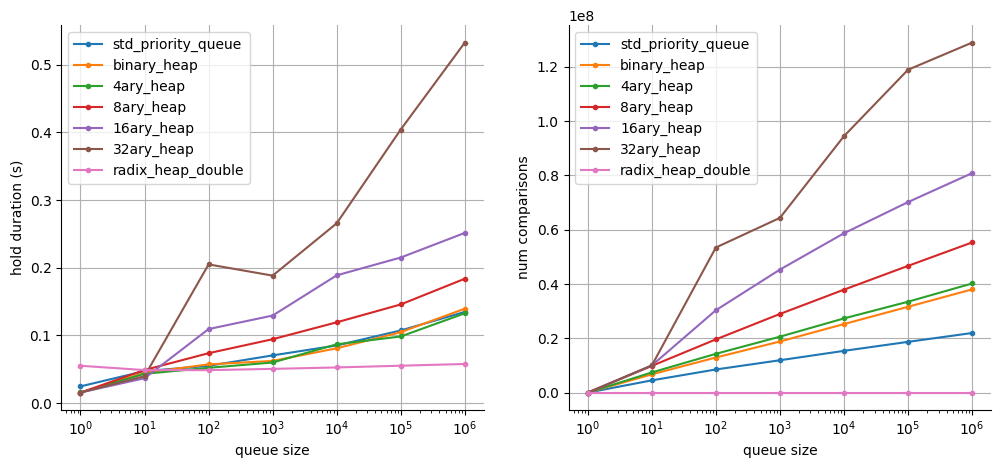

In [4]:
plot_time_and_num_cmp("ExponentialIncrement")

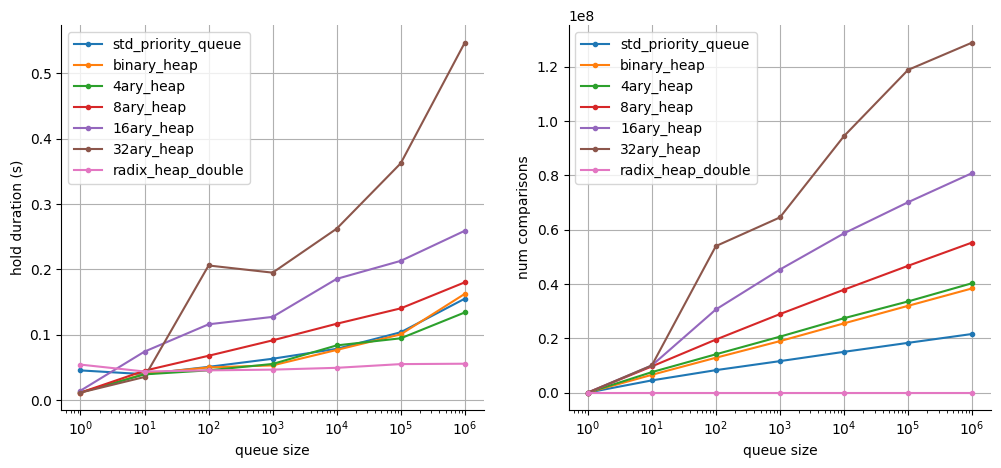

In [5]:
plot_time_and_num_cmp("BimodalIncrement")

In [17]:
def read_perf_output(perf_output):
    IGNORE = ["task-clock", "context-switches", "cpu-migrations"]
    metrics = {}
    for line in perf_output.split("\n"):
        if "#" in line:
            metric = line.split(":u")[0].split(" ")[-1]
            if metric in IGNORE:
                continue
            value = line.strip().split(" ")[0]
            value = value.replace(",", "")
            metrics[metric] = float(value)
    return metrics


In [ ]:
def plot_perf_stat(random_increment):
        for queue in QUEUES:
                ret = subprocess.run(args=["perf", "stat", "-d", EXECUTABLE_PATH, queue, 
                                        random_increment], capture_output=True, text=True)
                perf_output = ret.stderr
                metrics = read_perf_output(perf_output)
                plt.bar(x=[0, 1, 2, 3], height=[0, 1, 2, 3])
                break
        plt.show()

In [ ]:
plot_perf_stat("ExponentialIncrement")